In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib qt

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Check the aircraft

In [3]:
from Conceptual_Planes.embraer_E190 import embraer_E190
from Conceptual_Planes.boeing_737_100 import boeing_737_100

ModuleNotFoundError: No module named 'Conceptual_Planes'

Since we have set all the data, there are no missing parameters

In [35]:
embraer_E190.CL_MAX

2.6158573171653656

In [24]:
embraer_E190.get_missing_parameters()

[]

This is the Matching plot

In [25]:
embraer_E190.WEIGHT_RATIO = 0.86

1


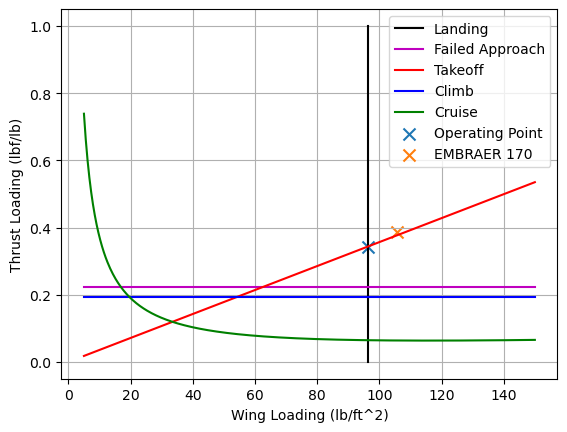

In [26]:
res = embraer_E190.far_criteria(plot=True, start_plot=True, show_plot=True, clip=[1,150])

# Optimization

In [27]:
def deviation_from_actual(
    plane,
    landing_curve,
    failed_approach_curve,
    takeoff_curve,
    climb_curve,
    cruise_curve,
    est_weight,
    est_area,
    est_thrust,
    OP_THRUST_LOADING,
    OP_WING_LOADING,
):
    AREA: float  = plane.AREA # 995.983667 ft^2
    MTOW : float = plane.MTOW # 105358.78 lb
    THRUST: float  = plane.THRUST # 40720 lb
        
    flag: float= 1
    if plane.MTOW/plane.AREA > landing_curve[0][0]:
        flag *= 10
        print("WARNING: MTOW/AREA")
    deviation = flag*(
        np.abs((est_weight- MTOW)/MTOW) + 
        np.abs((est_area-AREA)/AREA) + 
        np.abs((est_thrust-THRUST)/THRUST)
    )
    if plane.RANGE < 1000:
        flag *= 1000
    print(f"ARGS: {plane.ASPECT_RATIO=}, {plane.WEIGHT_RATIO=}, {plane.CL_MAX=}, \n{deviation=}")
    # print the takeoff curve slope 
    print(f"-------------------------")
    print(f"Wing Loading= {OP_WING_LOADING}, Thrust Loading = {OP_THRUST_LOADING}")
    print(f"-------------------------")
    print(f"{(est_weight-MTOW)/MTOW=},  {(est_area-AREA)/AREA=} ,  {(est_thrust-THRUST)/THRUST=}")
    print(f"-------------------------")
    print(f"{est_thrust=}, {THRUST=}")
    print(f"-------------------------")
    print(f"{est_area=}, {AREA=}")
    print(f"-------------------------")
    print(f"{est_weight=}, {MTOW=}")
    print(f"-------------------------")
    print(f"{plane.RANGE=}")

    return deviation 


In [28]:
min_fun = embraer_E190.partial_fun_factory(
    deviation_from_actual,
    ['ASPECT_RATIO', "CL_MAX", "WEIGHT_RATIO"],
    # plot=True, start_plot=True, show_plot=True, clip=[1,200]
)

Function will try to evaluate with the following params as inputs: ['ASPECT_RATIO', 'CL_MAX', 'WEIGHT_RATIO']


In [29]:
opt = minimize(
    min_fun,
    x0 = [9.2, 2.2 , 0.86],
    # bounds=[(6, 15), (1.5, 3.5), (0.6, 0.9)],
    method = 'Nelder-Mead',
    options = {'disp':True, 'maxiter':1000}
)

1
ARGS: plane.ASPECT_RATIO=9.2, plane.WEIGHT_RATIO=0.86, plane.CL_MAX=2.2, 
deviation=array([0.6462043])
-------------------------
Wing Loading= [122.94589178], Thrust Loading = [0.34259722]
-------------------------
(est_weight-MTOW)/MTOW=array([-0.14309058]),  (est_area-AREA)/AREA=array([-0.26270812]) ,  (est_thrust-THRUST)/THRUST=array([-0.2404056])
-------------------------
est_thrust=array([30930.68385015]), THRUST=40720
-------------------------
est_area=array([734.33067189]), AREA=995.983667
-------------------------
est_weight=array([90282.93931995]), MTOW=105358.78979999998
-------------------------
plane.RANGE=1900
1
ARGS: plane.ASPECT_RATIO=9.66, plane.WEIGHT_RATIO=0.86, plane.CL_MAX=2.2, 
deviation=array([0.67527794])
-------------------------
Wing Loading= [122.94589178], Thrust Loading = [0.34259722]
-------------------------
(est_weight-MTOW)/MTOW=array([-0.15367496]),  (est_area-AREA)/AREA=array([-0.27181501]) ,  (est_thrust-THRUST)/THRUST=array([-0.24978797])
---------

## Display the results

1


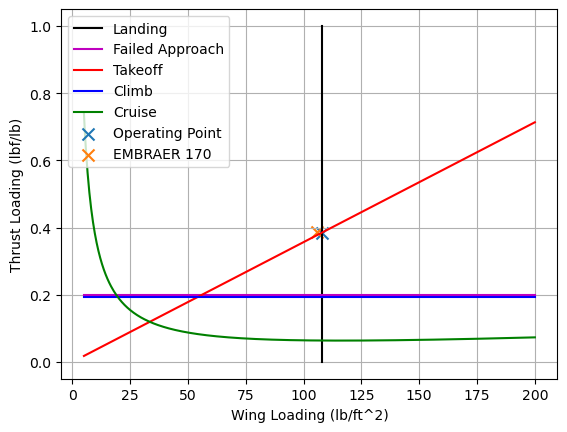

ARGS: plane.ASPECT_RATIO=9.29105844381234, plane.WEIGHT_RATIO=0.7689166444178016, plane.CL_MAX=1.719034971503333, 
deviation=array([0.04450034])
-------------------------
Wing Loading= [107.7755511], Thrust Loading = [0.38435101]
-------------------------
(est_weight-MTOW)/MTOW=array([0.0230222]),  (est_area-AREA)/AREA=array([0.00411478]) ,  (est_thrust-THRUST)/THRUST=array([0.01736336])
-------------------------
est_thrust=array([41427.03603504]), THRUST=40720
-------------------------
est_area=array([1000.08192472]), AREA=995.983667
-------------------------
est_weight=array([107784.38058426]), MTOW=105358.78979999998
-------------------------
plane.RANGE=1900


array([0.04450034])

In [30]:
min_fun(opt.x, plot=True, start_plot=True, show_plot=True, clip=[1,200])

In [31]:
embraer_E190.MLW/ embraer_E190.MTOW

0.8537350910232268